# DATA CLEANING

<h4>IQR</h4>

In [61]:
import numpy as np

#calculate the interquartile range
data=[1,1,6,13,13,14,14,14,15,15,16,18,19,18,19,56]
q25,q50,q75=np.percentile(data,[25,50,75])
IQR=q75-q25
print('IQR: ',IQR)

#min and max limits to be considered as outliers
min=q25-(1.5*IQR)
max=q75+(1.5*IQR)
print(f'min {min} max {max}')

[x for x in data if (x<min or x>max)]

IQR:  5.0
min 5.5 max 25.5


[1, 1, 56]

# EDA

In [77]:
import pandas as pd

data=pd.read_csv("IBM_DATA/iris.csv")
data.head()
data=data.iloc[:,1:]

#sample 5 rows
sample=data.sample(n=5,replace=False)
print(sample.iloc[:,-3:])
print(sample.loc[:,["SepalWidthCm"]])
sample

     PetalLengthCm  PetalWidthCm         Species
12             1.4           0.1     Iris-setosa
25             1.6           0.2     Iris-setosa
113            5.0           2.0  Iris-virginica
120            5.7           2.3  Iris-virginica
47             1.4           0.2     Iris-setosa
     SepalWidthCm
12            3.0
25            3.0
113           2.5
120           3.2
47            3.2


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
12,4.8,3.0,1.4,0.1,Iris-setosa
25,5.0,3.0,1.6,0.2,Iris-setosa
113,5.7,2.5,5.0,2.0,Iris-virginica
120,6.9,3.2,5.7,2.3,Iris-virginica
47,4.6,3.2,1.4,0.2,Iris-setosa


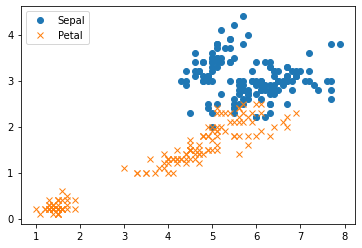

In [63]:
#PANDAS DATAFRAME APPROACH
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(data.SepalLengthCm,
        data.SepalWidthCm,
        ls='',
        marker='o',
        label="Sepal")

plt.plot(data.PetalLengthCm,
        data.PetalWidthCm,
        ls='',
        marker='x',
        label="Petal")
plt.legend()

(array([ 2.,  2.,  7., 12., 14., 11.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  2.,  0.,  2.,  2.,  1.,  3.,  5.,
         3.,  6.,  4.,  8.,  3.,  5.,  4.,  9.,  8.,  2.,  2.,  2.,  9.,
         3.,  3.,  2.,  2.,  3.,  1.,  1.,  0.,  1.,  2.,  1.]),
 array([1.   , 1.118, 1.236, 1.354, 1.472, 1.59 , 1.708, 1.826, 1.944,
        2.062, 2.18 , 2.298, 2.416, 2.534, 2.652, 2.77 , 2.888, 3.006,
        3.124, 3.242, 3.36 , 3.478, 3.596, 3.714, 3.832, 3.95 , 4.068,
        4.186, 4.304, 4.422, 4.54 , 4.658, 4.776, 4.894, 5.012, 5.13 ,
        5.248, 5.366, 5.484, 5.602, 5.72 , 5.838, 5.956, 6.074, 6.192,
        6.31 , 6.428, 6.546, 6.664, 6.782, 6.9  ]),
 <BarContainer object of 50 artists>)

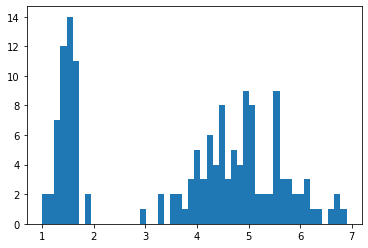

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(data.PetalLengthCm,bins=50)

[Text(0.5, 0, 'xlabel'), Text(0, 0.5, 'y_label'), Text(0.5, 1.0, 'Title')]

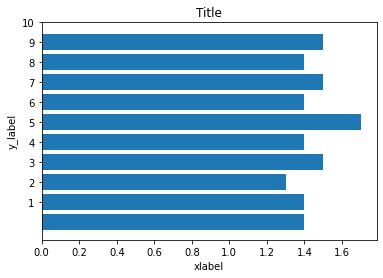

In [65]:
#matplotlib syntax

fig,ax=plt.subplots()
ax.barh(np.arange(10),
       data.PetalLengthCm.iloc[:10])

#set position of ticks and tick labels
ax.set_yticks(np.arange(0.4,10.4,1.0))
ax.set_yticks(np.arange(1,11))
ax.set(xlabel='xlabel',ylabel='y_label',title='Title')

<AxesSubplot:xlabel='Species'>

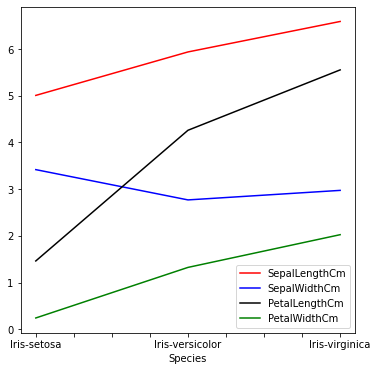

In [78]:
#PANDAS DATAFRAME APPROACH

data.groupby('Species').mean().plot(color=['red','blue','black','green'],fontsize=10,figsize=(6,6))

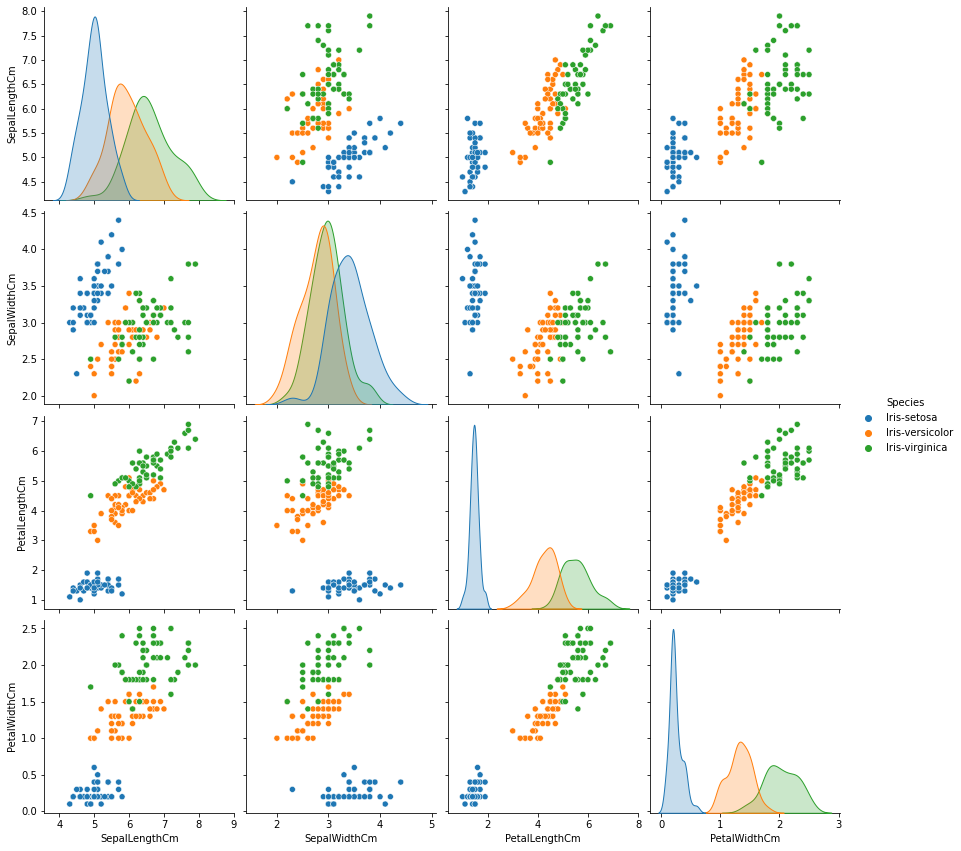

In [80]:
#SEABORN PLOT, FEATURE COLLECTION

import seaborn as sns
sns.pairplot(data,hue="Species",height=3)

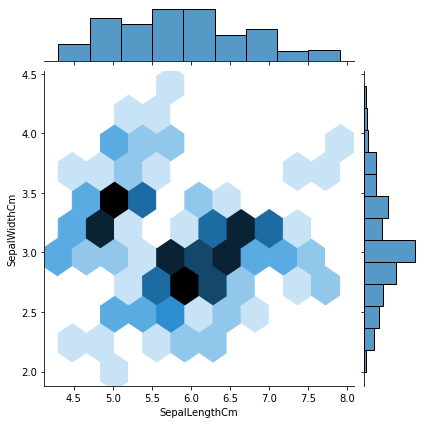

In [84]:
#HEXBIN PLOT
sns.jointplot(x=data['SepalLengthCm'],y=data['SepalWidthCm'],kind='hex')

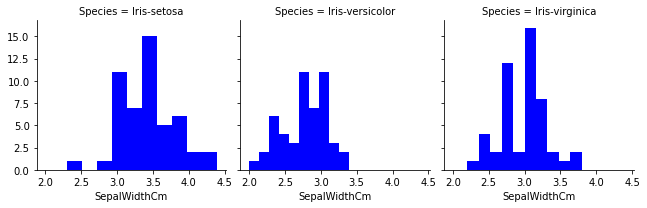

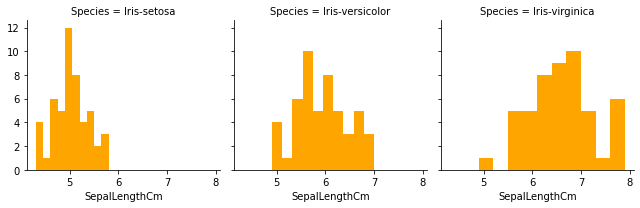

In [89]:
#FACET GRID

#first plot
plot=sns.FacetGrid(data,col='Species',margin_titles=True)
plot.map(plt.hist,'SepalWidthCm',color='blue')

#second plot
plot=sns.FacetGrid(data,col='Species',margin_titles=True)
plot.map(plt.hist,'SepalLengthCm',color="orange")